In [1]:
import matplotlib.pyplot as plt
import os
import pickle
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv('BA_AirlineReviews.csv')
df

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,3696,1.0,British Airways customer review,J Robertson,29th August 2012,False,This was a bmi Regional operated flight on a R...,NaN,Economy Class,NaN,NaN,3.0,1.0,NaN,3.0,no,NaN,2.0,NaN,NaN
3697,3697,9.0,British Airways customer review,Nick Berry,28th August 2012,False,LHR to HAM. Purser addresses all club passenge...,NaN,Business Class,NaN,NaN,4.0,5.0,NaN,3.0,yes,NaN,4.0,NaN,NaN
3698,3698,5.0,British Airways customer review,Avril Barclay,12th October 2011,False,My son who had worked for British Airways urge...,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,4.0,yes,NaN,NaN,NaN,NaN
3699,3699,4.0,British Airways customer review,C Volz,11th October 2011,False,London City-New York JFK via Shannon on A318 b...,NaN,Premium Economy,NaN,NaN,1.0,3.0,NaN,1.0,no,NaN,5.0,NaN,NaN


In [3]:
print(df['ReviewHeader'].iloc[0])

"Service level far worse then Ryanair"


In [4]:
print(df['ReviewBody'].iloc[0])

4 Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time. So did the capacity of the Heathrow Airport really hit British Airways by surprise, 4h before departure? Anyhow - we took the one hour delay so what - but then we have been forced to check in our Hand luggage. I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage. Overall 2h later at home than planed, with really no reason, just due to incompetent people. Service level far worse then Ryanair and triple the price. Really never again. Thanks for nothing.


In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [6]:
analyzer = SentimentIntensityAnalyzer()

In [7]:
print(analyzer.polarity_scores(df['ReviewHeader'].iloc[0])) # "Service level far worse then Ryanair"
print(analyzer.polarity_scores(df['ReviewBody'].iloc[0]))

{'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'compound': -0.4767}
{'neg': 0.176, 'neu': 0.756, 'pos': 0.068, 'compound': -0.9342}


In [8]:
# test sentiment feeling for ReviewHeader saying 'British Airways Customer Review
print(df['ReviewHeader'].iloc[3700])
print(analyzer.polarity_scores(df['ReviewHeader'].iloc[3700]))

British Airways customer review
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [10]:
# list creation 
headers_score = []
# comparision of review headlines vs review body
for header in df['ReviewHeader']:
    header_sentiment = analyzer.polarity_scores(header)
    headers_score.append(header_sentiment['compound'])    

In [11]:
body_score = []
for body in df['ReviewBody']:
    body_sentiment = analyzer.polarity_scores(body)
    body_score.append(body_sentiment['compound'])

In [12]:
df['header_sentiment'] = headers_score
df['body_sentiment'] = body_score

Text(0, 0.5, 'Frequency')

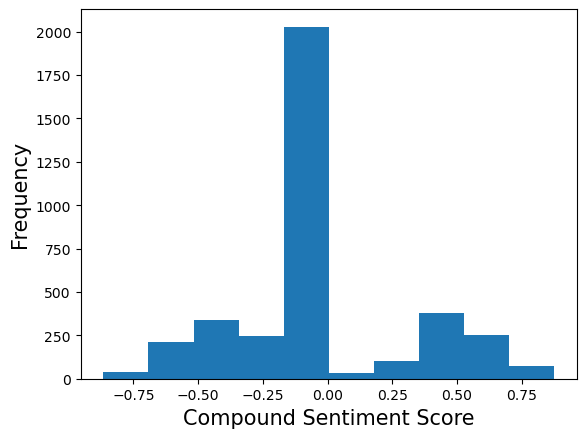

In [13]:
# headers
df['header_sentiment'].hist(grid=False)
plt.xlabel('Compound Sentiment Score', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

Text(0, 0.5, 'Frequency')

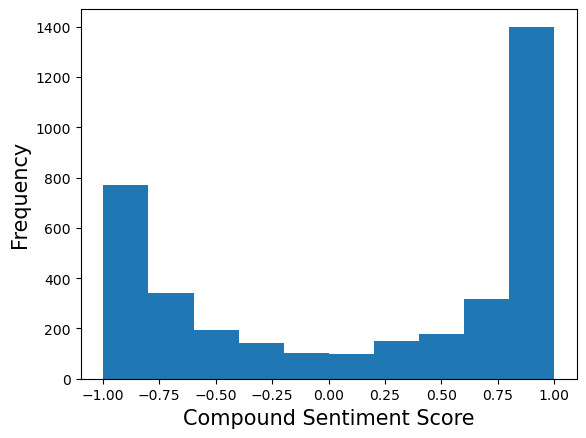

In [14]:
# review body
df['body_sentiment'].hist(grid=False)
plt.xlabel('Compound Sentiment Score', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

In [15]:
df

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,...,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity,header_sentiment,body_sentiment
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,...,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN,-0.4767,-0.9342
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,...,3.0,1.0,2.0,no,A320,1.0,2.0,2.0,0.0000,-0.9209
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,...,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN,0.0000,0.5927
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,...,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN,-0.5095,-0.8489
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,...,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0,0.0000,0.8392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,3696,1.0,British Airways customer review,J Robertson,29th August 2012,False,This was a bmi Regional operated flight on a R...,NaN,Economy Class,NaN,...,1.0,NaN,3.0,no,NaN,2.0,NaN,NaN,0.0000,-0.7254
3697,3697,9.0,British Airways customer review,Nick Berry,28th August 2012,False,LHR to HAM. Purser addresses all club passenge...,NaN,Business Class,NaN,...,5.0,NaN,3.0,yes,NaN,4.0,NaN,NaN,0.0000,0.8720
3698,3698,5.0,British Airways customer review,Avril Barclay,12th October 2011,False,My son who had worked for British Airways urge...,NaN,Economy Class,NaN,...,NaN,NaN,4.0,yes,NaN,NaN,NaN,NaN,0.0000,0.6640
3699,3699,4.0,British Airways customer review,C Volz,11th October 2011,False,London City-New York JFK via Shannon on A318 b...,NaN,Premium Economy,NaN,...,3.0,NaN,1.0,no,NaN,5.0,NaN,NaN,0.0000,0.9148


/var/folders/m9/vz1tzq8j7rldj2225vbbzpfh0000gn/T/ipykernel_88115/83429506.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

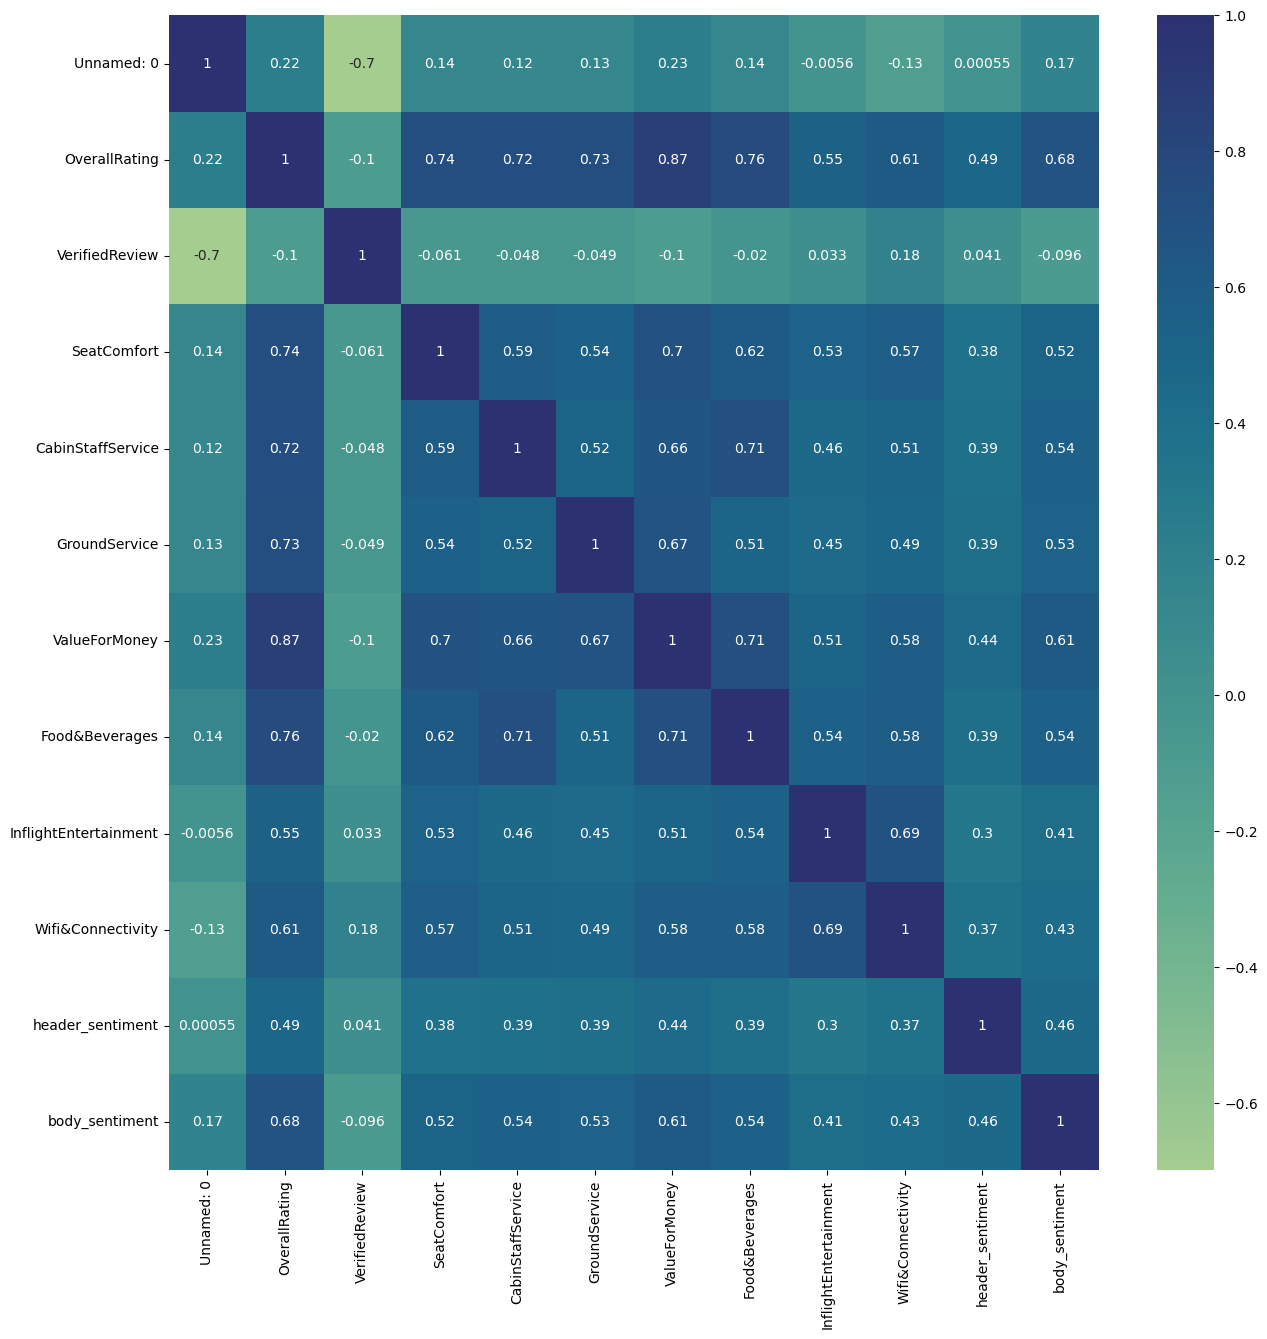

In [35]:
import seaborn as sns
correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, cmap='crest')

In [ ]:
header_posts = df['ReviewHeader']
body_posts = df['ReviewBody']

fig, ax = plt.subplots(1,1, figsize=(10,5))
header_posts.hist(df['header_sentiment'],
                 #histtype='step',
                 lw=2,
                 grid=False,
                 density=True,
                 label='Header',
                 ax=ax)
body_posts.hist(df['body_sentiment'],
               #hisstype='step',
               lw=2,
               grid=False,
               density=True,
               label='NTA',
               ax=ax)
plt.legend(loc='upper center', prop={'size': 15})
# Create labels
plt.xlabel('Compound Sentiment Score', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('')
plt.show()


Question: does the overall rating correlate with the sentiment of the review (body)?

In [24]:
# does the overall rating correlate with sentiment
from scipy.stats import binned_statistic
import numpy as np

def plot_rating_vs_sentiment(body_sentiment,rating,n_bins=9):
    bin_means, bin_edges, binnumber = binned_statistic(body_sentiment,
                                                      rating,
                                                      statistic='mean',
                                                      bins=np.linspace(-1,1, n_bins))
    # calculate bin width of bar plot
    binwidth = np.ediff1d(bin_edges)[0]
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.bar(x=bin_edges[:-1] + binwidth / 2, height=bin_means, width=binwidth)
    ax.set_xlim([-1, 1])
    return fig, ax

Text(0, 0.5, 'Average Rating Score')

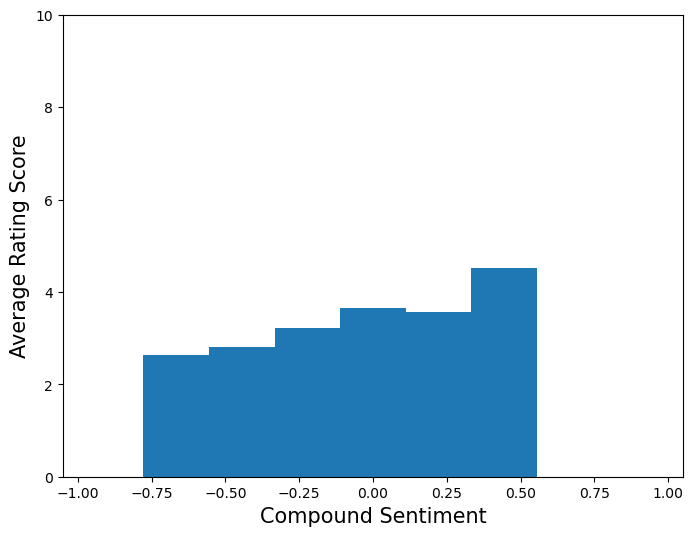

In [31]:
plot_rating_vs_sentiment(df['body_sentiment'], df['OverallRating'], n_bins=10)
plt.xlim([-1.05, 1.05])
plt.ylim([0, 10])
plt.xlabel('Compound Sentiment', fontsize=15)
plt.ylabel('Average Rating Score', fontsize=15)

# pattern shows that posts with the most negative sentiment are typically rated lower

Result: Ratings with a negative sentiment score are typically ratined betweed 2-3 stars. Ratings with a neutral sentiment score are typically rated around 4 stars. Ratings with a positive sentiment score are typically rated 4-5 stars.

Question: does the overall rating correlate with the sentiment in the review header?

Text(0, 0.5, 'Average Rating Score')

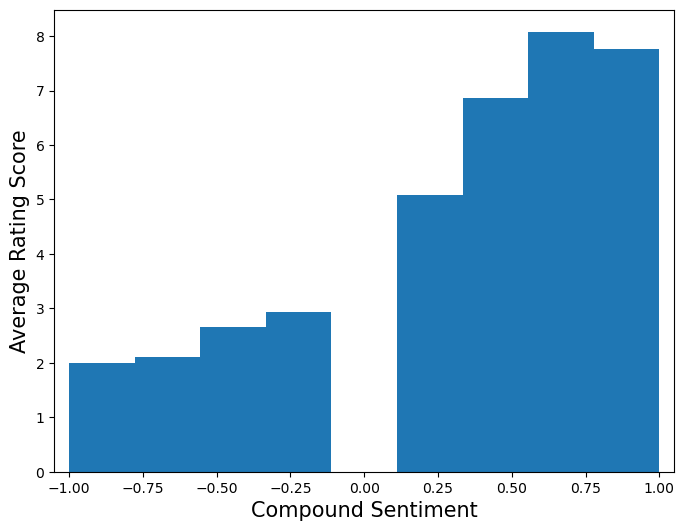

In [30]:
plot_rating_vs_sentiment(df['header_sentiment'], df['OverallRating'],n_bins=10)
plt.xlim([-1.05, 1.05])
#plt.ylim([0, 5])
plt.xlabel('Compound Sentiment', fontsize=15)
plt.ylabel('Average Rating Score', fontsize=15)

Result: Ratings with negative scores are rated between 0-3 stars. It is interesting that there is no bar for neutral (suggests possible investigation might be needed). Ratings with positive scores are rated between 5-8 stars. 